In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
indicators = pd.read_csv('Indicators.csv')
indicators.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [4]:
df=indicators[(indicators['CountryName']=='Canada') & (indicators['IndicatorCode']=='SI.SPR.PCAP.ZG')]
df.reset_index(drop=True)
df


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4889909,Canada,CAN,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,2010,1.93


In [5]:
df.IndicatorCode.value_counts()


SI.SPR.PCAP.ZG    1
Name: IndicatorCode, dtype: int64

###### Selecting the Indicator to work upon

In [6]:
prop = indicators['IndicatorName'].str.contains('property')

In [7]:
indicators[prop]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3785002,Arab World,ARB,Procedures to register property (number),IC.PRP.PROC,2004,5.937500
3785035,Arab World,ARB,Time required to register property (days),IC.PRP.DURS,2004,47.562500
3785450,Caribbean small states,CSS,Procedures to register property (number),IC.PRP.PROC,2004,6.500000
3785498,Caribbean small states,CSS,Time required to register property (days),IC.PRP.DURS,2004,43.500000
3785982,Central Europe and the Baltics,CEB,Procedures to register property (number),IC.PRP.PROC,2004,5.727273
...,...,...,...,...,...,...
5656299,"Yemen, Rep.",YEM,Time required to register property (days),IC.PRP.DURS,2015,19.000000
5656365,Zambia,ZMB,Procedures to register property (number),IC.PRP.PROC,2015,5.000000
5656376,Zambia,ZMB,Time required to register property (days),IC.PRP.DURS,2015,45.000000
5656442,Zimbabwe,ZWE,Procedures to register property (number),IC.PRP.PROC,2015,5.000000


In [8]:
indicators[prop]['IndicatorCode'].unique()

array(['IC.PRP.PROC', 'IC.PRP.DURS', 'BM.GSR.ROYL.CD', 'BX.GSR.ROYL.CD',
       'IQ.CPA.PROP.XQ'], dtype=object)

In [9]:
indicators.query('IndicatorCode == "IQ.CPA.PROP.XQ"')

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3942725,Arab World,ARB,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2005,2.500000
3943256,Caribbean small states,CSS,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2005,3.800000
3944445,East Asia & Pacific (all income levels),EAS,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2005,3.045455
3945064,East Asia & Pacific (developing only),EAP,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2005,3.045455
3946466,Europe & Central Asia (all income levels),ECS,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2005,2.950000
...,...,...,...,...,...,...
5638567,Vanuatu,VUT,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2014,3.500000
5639297,Vietnam,VNM,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2014,3.500000
5640209,"Yemen, Rep.",YEM,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2014,2.000000
5640622,Zambia,ZMB,CPIA property rights and rule-based governance...,IQ.CPA.PROP.XQ,2014,3.000000


In [10]:
indicators.loc[3945064,'IndicatorName'] #IQ.CPA.PROP.XQ

'CPIA property rights and rule-based governance rating (1=low to 6=high)'

In [11]:
indicators.loc[3942683,'IndicatorName'] #BM.GSR.ROYL.CD

'Charges for the use of intellectual property, payments (BoP, current US$)'

In [12]:
indicators.loc[3943213,'IndicatorName'] #BX.GSR.ROYL.CD

'Charges for the use of intellectual property, receipts (BoP, current US$)'

##### Problem Statement: To Check for time required to register a property and the number of procedures involved to register a property in different countries 
Selecting 2 indicators "Procedures to register property (number)IC.PRP.PROC" and "Time required to register property (days) IC.PRP.DURS"

In [13]:
prp_durs = indicators.query('IndicatorCode == "IC.PRP.DURS"')

In [14]:
prp_durs.sample(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4305396,Europe & Central Asia (developing only),ECA,Time required to register property (days),IC.PRP.DURS,2007,75.611111
5359031,Tajikistan,TJK,Time required to register property (days),IC.PRP.DURS,2012,37.000000
5115623,Israel,ISR,Time required to register property (days),IC.PRP.DURS,2011,144.000000
4825995,Tunisia,TUN,Time required to register property (days),IC.PRP.DURS,2009,39.000000
4005863,Dominica,DMA,Time required to register property (days),IC.PRP.DURS,2005,42.000000
4923269,Guinea,GIN,Time required to register property (days),IC.PRP.DURS,2010,59.000000
4813164,St. Kitts and Nevis,KNA,Time required to register property (days),IC.PRP.DURS,2009,82.000000
4148133,Angola,AGO,Time required to register property (days),IC.PRP.DURS,2006,335.000000
3828311,Chad,TCD,Time required to register property (days),IC.PRP.DURS,2004,44.000000
5126032,Latvia,LVA,Time required to register property (days),IC.PRP.DURS,2011,17.500000


In [15]:
prp_durs.shape

(2416, 6)

In [16]:
prp_durs.CountryCode.nunique()

217

In [17]:
prp_durs.Year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

###### The below graph shows the reduction in number of days required to register a property as years pass by

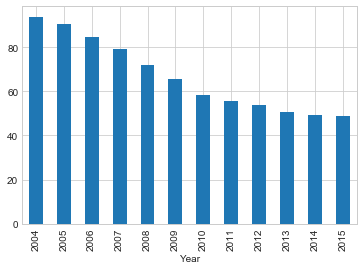

In [18]:
num_days = prp_durs.groupby('Year')['Value'].mean()
num_days.plot(kind='bar')

The below graph shows the top 10 countries with least number of days required to register a property

Text(0.5, 0, '# of Days')

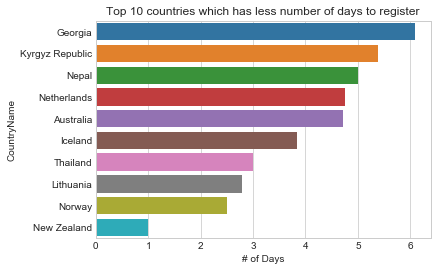

In [19]:
mi_days = prp_durs.groupby('CountryName',as_index=False)['Value'].mean().sort_values(by='Value',ascending=False).tail(10)
sns.barplot(mi_days['Value'],mi_days['CountryName'])
plt.title("Top 10 countries which has less number of days to register")
plt.xlabel('# of Days')

###### Working on Procedures to register property (number)IC.PRP.PROC

In [20]:
proc = indicators.query('IndicatorCode == "IC.PRP.PROC"')
proc.sample(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3803006,Upper middle income,UMC,Procedures to register property (number),IC.PRP.PROC,2004,6.571429
4428342,Niger,NER,Procedures to register property (number),IC.PRP.PROC,2007,4.000000
4253993,Papua New Guinea,PNG,Procedures to register property (number),IC.PRP.PROC,2006,4.000000
5642038,Europe & Central Asia (all income levels),ECS,Procedures to register property (number),IC.PRP.PROC,2015,4.918367
3956542,Middle East & North Africa (all income levels),MEA,Procedures to register property (number),IC.PRP.PROC,2005,6.117647
5414393,Brazil,BRA,Procedures to register property (number),IC.PRP.PROC,2013,13.600000
5648703,Hungary,HUN,Procedures to register property (number),IC.PRP.PROC,2015,4.000000
5075873,Chad,TCD,Procedures to register property (number),IC.PRP.PROC,2011,6.000000
3789641,European Union,EUU,Procedures to register property (number),IC.PRP.PROC,2004,5.560000
4881240,Bosnia and Herzegovina,BIH,Procedures to register property (number),IC.PRP.PROC,2010,7.000000


In [21]:
proc.shape

(2416, 6)

The below graph shows that the number of procedures remains the same down the years

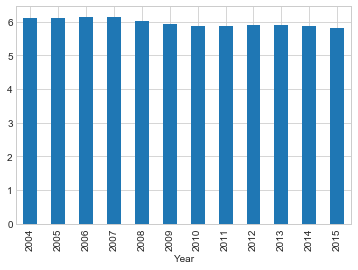

In [22]:
num_proc = proc.groupby('Year')['Value'].mean()
num_proc.plot(kind='bar')

Text(0.5, 0, '# of procedure')

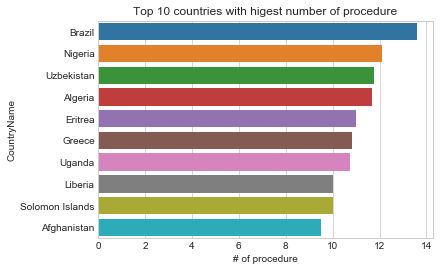

In [23]:
ma_proc = proc.groupby('CountryName',as_index=False)['Value'].mean().sort_values(by='Value',ascending=False).iloc[:10]
sns.barplot(ma_proc['Value'],ma_proc['CountryName'])
plt.title("Top 10 countries with higest number of procedure")
plt.xlabel('# of procedure')

We can incure that thoug the number of days to register a property have been reduced, but the number of procedure invloved almost remains the same for a particular Country in the below example

Text(0, 0.5, 'Days')

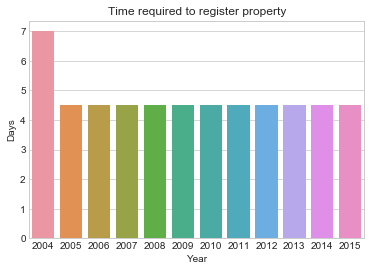

In [24]:
prp_dur_au = prp_durs.loc[(prp_durs['CountryName']=="Australia" )] 
sns.barplot(prp_dur_au['Year'],prp_dur_au['Value'])
plt.title('Time required to register property')
plt.ylabel('Days')

Text(0, 0.5, '# of Procedure')

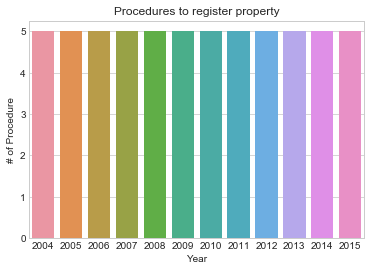

In [25]:
proc_au = proc.loc[ (proc['CountryName']=="Australia" )  ]
sns.barplot(proc_au['Year'],proc_au['Value'])
plt.title('Procedures to register property')
plt.ylabel('# of Procedure')